In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.6.0


In [15]:
a1 = tf.Variable(1)
a2 = tf.Variable([1])
a3 = tf.Variable([1,2])
a4 = tf.Variable([[1,2], [3,4]])

print("a1 : ", a1)
print("a2 : ", a2)
print("a3 : ", a3)
print("a4 : ", a4)

a1 :  <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
a2 :  <tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([1])>
a3 :  <tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2])>
a4 :  <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>


In [18]:
#tf.reduce_mean
v = [1.,2.,3.,4.]      # rank = 1차원
tf.reduce_mean(v)      # rank = 0차원

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [3]:
#tf.square
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

## 1. Hypothesis 만들기

In [12]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

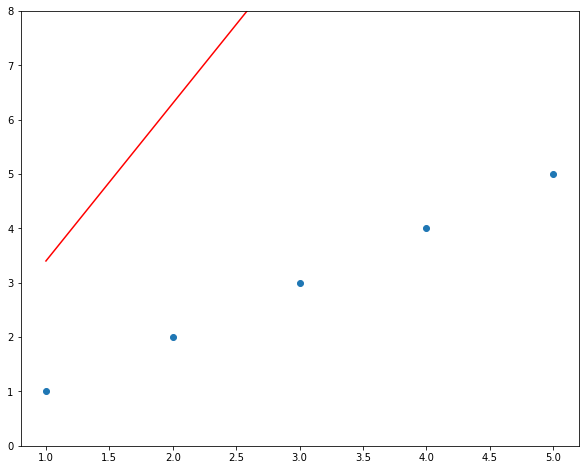

In [13]:
plt.figure(figsize = (10,8))
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)
plt.show()

## 2. cost 함수 만들기

In [6]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

 ## 3. Gradient descent - W / b 업데이트 알고리즘

In [7]:
learning_rate = 0.01

with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad = tape.gradient(cost, W) 
b_grad = tape.gradient(cost, b)

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

## 4. W / b 업데이트

In [8]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
learning_rate = 0.01

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


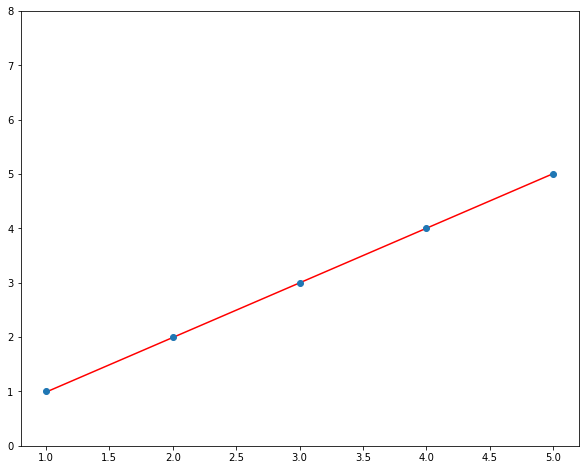

In [10]:
plt.figure(figsize = (10,8))
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)
plt.show()

## 5. 전체 코드

In [20]:
import tensorflow as tf
import numpy as np

x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100+1):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    W_grad, b_grad = tape.gradient(cost, [W,b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059
  100|    1.0048|  -0.01733|  0.000055


## 6. 검증 - 새로운 데이터

In [22]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
